<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Decession_Trees_ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/PlayTennis.csv")

In [43]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [44]:
target = 'Play Tennis'
X = df.loc[:, df.columns != target]
y = df[target]

In [45]:
X.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')

In [46]:
name_of_features = X.columns
name_of_classes  = list(set(y))

In [47]:
name_of_classes

['No', 'Yes']

In [48]:
name_of_features

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')

In [49]:
X = encode(X)

<ipython-input-41-68df0e1d5696>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=encoder.fit_transform(data[i])
<ipython-input-41-68df0e1d5696>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=encoder.fit_transform(data[i])
<ipython-input-41-68df0e1d5696>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [50]:
X.head()

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X,y)

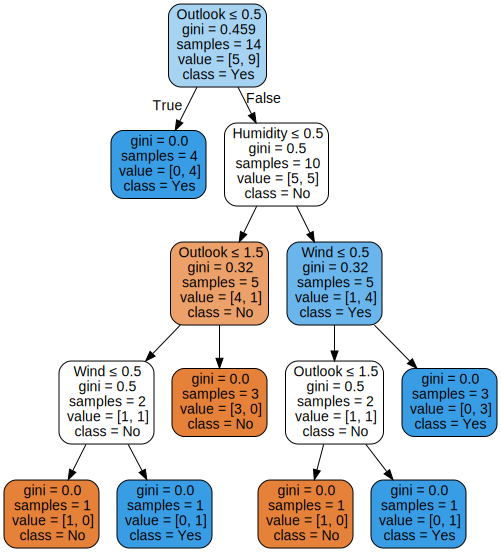

In [52]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=name_of_features,
                      class_names= name_of_classes,
                      filled=True, rounded=True,
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("tree")
graph